This code continues on code 'econ_experiment_convergence'. After we have summarised the key points for each category (timebased and milestone), we continue to calculate the frequency for each point. 

So far, the frequency is not quite converged. Further model tunning of the model is required. 

In [1]:
import pandas as pd
import numpy  as np
from openai import OpenAI
import time
import matplotlib.pyplot as plt

In [2]:
client = OpenAI(
    base_url='<replace>',
    api_key='<replace>'
)


def summarise_text_key_points_frequency_timebased(text):
    completion = client.chat.completions.create(
        model="gpt-4o",
        messages=[
            {"role": "user", "content": f"""The following texts are 199 number of responses from the participants in an economic experiment. 
            ... Each response is delimited by \n. 
            ... We have already summarised four key points in those responses of why those participants chose timebased feedback. 
            ... The four key points are:
            ... (1) transparency, clear, visibility
            ... (2) precise, detailed, exact contribution, accurate progress
            ... (3) real-time feedback
            ... (4) cumulative contribution, ongoing contribution
            ... For each resonse, can you categorise it into the four key points?
            ... Each respone can be categorised into multiple key points or no key point, not necessary into one key point. 
            ... Tell me the number responses for the four key points and also print the corresponding responses for each key point. 
            ... The 199 number of responses are shown below:\n\n{text}"""}
        ]
    )

    # Correctly access the message content from the response
    message_content = completion.choices[0].message.content.strip().lower()

    return message_content


def summarise_text_key_points_frequency_milestone(text):
    completion = client.chat.completions.create(
        model="gpt-4o",
        messages=[
            {"role": "user", "content": f"""The following texts are 68 number of responses from the participants in an economic experiment. 
            ... Each response is delimited by \n. 
            ... We have already summarised two key points in those responses of why those participants chose milestone feedback. 
            ... The two key points are:
            ... (1) ambiguity, vagueness, no exact contribution, lack of transparency, unclear
            ... (2) anonymity, conceal personal contribution, without disclosing details
            ... For each resonse, can you categorise it into the two key points?
            ... Each respone can be categorised into multiple key points or no key point, not necessary into one key point. 
            ... Tell me the number responses for the two key points and also print the corresponding responses for each key point. .
            ... The 68 number of responses are shown below:\n\n{text}"""}
        ]
    )

    # Correctly access the message content from the response
    message_content = completion.choices[0].message.content.strip().lower()

    return message_content

In [3]:
# read the excel file
df = pd.read_excel('241124_survey.xlsx')

df_timebased = df[(df['chosen_feedback'] == 'Timebased feedback')]
vote_feedback_explain_timebased = '\n'.join(df_timebased['vote_feedback_explain'].astype(str))

In [4]:
print(f"{summarise_text_key_points_frequency_timebased(vote_feedback_explain_timebased)}")

based on the provided responses and the categorization criteria, i classified them into the four key points mentioned:

- **transparency, clear, visibility:**
  - responses: 
    - "it was clearer how many tokens members contributed, it helped to make a more comprehensive decision on how many tokens i will put in compare to my team mate."
    - "it's clear to show the amount of our team's contribution."
    - "option 1 is much clearer regarding the contribution, but option 2 seems to be not quite clear."
    - ... (and many more similar responses focusing on clarity and transparency aspects)

- **precise, detailed, exact contribution, accurate progress:**
  - responses:
    - "it was clearer to see the exact number of tokens contributed so that i could plan out my next decision more accurately."
    - "i prefer to know the exact number of the effort units contributed. gives a clearer idea."
    - "more clearly to see others' options"
    - ... (and many more responses emphasizing the p

-------------------------------------------------------------------------------------------------------------------------------------------

Now, we plot the result. 

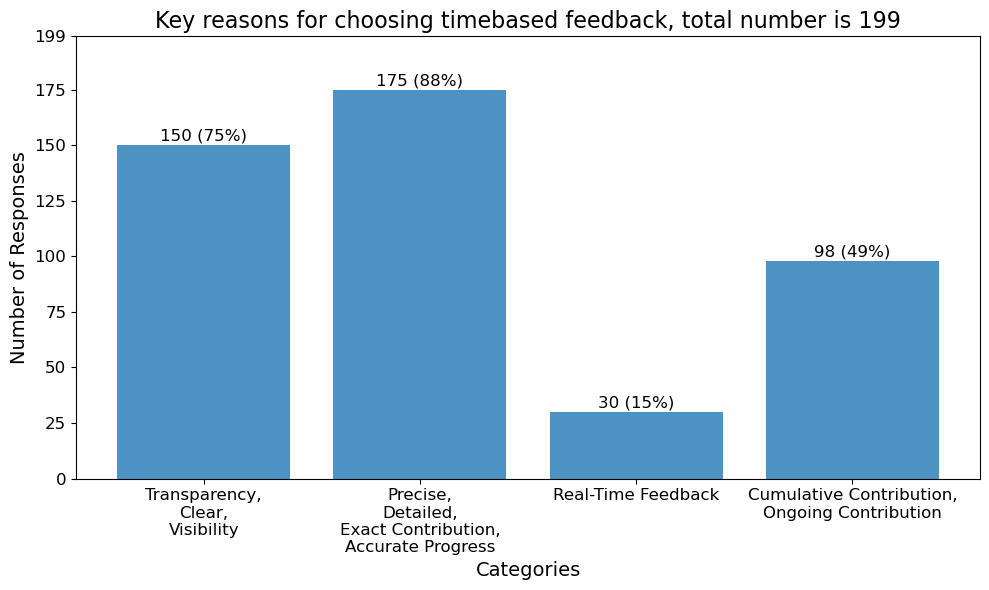

In [5]:
# Data for the bar chart
categories = [
    "Transparency,\nClear,\nVisibility",
    "Precise,\nDetailed,\nExact Contribution,\nAccurate Progress",
    "Real-Time Feedback",
    "Cumulative Contribution,\nOngoing Contribution"
]
# responses = [176, 143, 3, 12]
# responses = [127, 107, 18, 24]
responses = [150, 175, 30, 98]
responses_frequency = [i1/199 for i1 in responses]

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(categories, responses, alpha=0.8)

# Add titles and labels
plt.title('Key reasons for choosing timebased feedback, total number is 199', fontsize=16)
plt.xlabel('Categories', fontsize=14)
plt.ylabel('Number of Responses', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks([0, 25, 50, 75, 100, 125, 150, 175, 199], fontsize=12)
plt.ylim(0, 199)

# Show the values on top of the bars
for i, (v, freq) in enumerate(zip(responses, responses_frequency)):
    plt.text(i, v + 2, f"{v} ({freq:.0%})", ha='center', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

-------------------------------------------------------------------------------------------------------------------------------------------

In [6]:
df_milestone = df[(df['chosen_feedback'] == 'Milestone feedback')]
vote_feedback_explain_milestone = '\n'.join(df_milestone['vote_feedback_explain'].astype(str))

In [8]:
print(f"{summarise_text_key_points_frequency_milestone(vote_feedback_explain_milestone)}")

to categorize the responses, i'll go through each and see if it aligns with the key points.

### key point 1: ambiguity, vagueness, no exact contribution, lack of transparency, unclear

1. i felt like this option had the most chances of maximizing my profit as people wouldn’t know exactly how much tokens were contributed in the previous rounds making it more vague.
3. it is more vague so there is possibility to gain more tokens.
4. there will be less pressure for me to make more contribution since i am not very clear on how much others have contributed
11. option2 gives a better sense about the process so far and the stage we are at, rather than option 1 which is too precise that makes me want to calculate the average contribution.
14. unspesific information makes people guessing and take more risks.
16. prisoner's dilemma would apply to all people taking the experiment. hence, it is better if there is ambiguity in the contribution i make so that others can make more and i can profit f

-------------------------------------------------------------------------------------------------------------------------------------------

Now, we plot the result. 

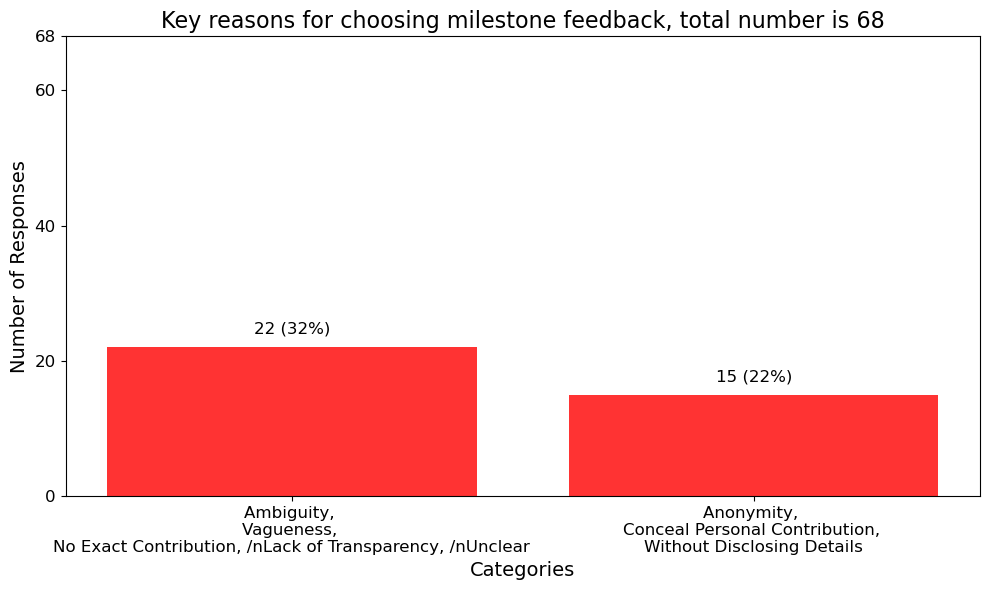

In [10]:
# Data for the bar chart
categories = [
    "Ambiguity, \nVagueness, \nNo Exact Contribution, /nLack of Transparency, /nUnclear",
    "Anonymity, \nConceal Personal Contribution, \nWithout Disclosing Details",
]

responses = [22,15]
responses_frequency = [i1/68 for i1 in responses]

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(categories, responses, alpha=0.8, color='red')

# Add titles and labels
plt.title('Key reasons for choosing milestone feedback, total number is 68', fontsize=16)
plt.xlabel('Categories', fontsize=14)
plt.ylabel('Number of Responses', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks([0, 20, 40, 60, 68], fontsize=12)
plt.ylim(0, 68)

# Show the values on top of the bars
for i, (v, freq) in enumerate(zip(responses, responses_frequency)):
    plt.text(i, v + 2, f"{v} ({freq:.0%})", ha='center', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()